Imports

In [49]:
from tensorflow import keras
import numpy as np

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
import warnings
warnings.filterwarnings("ignore")

#### Data Loading

In [53]:
biomass_history_unscaled = pd.read_csv(r"C:\Users\parul\OneDrive\Desktop\Projects\ShellAI\Shell_AI_Hackathon\dataset\Biomass_History.csv")

In [54]:
biomass_history_unscaled.head()

,Index,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885


In [55]:
biomass_history_scaled = pd.read_csv(r"C:\Users\parul\OneDrive\Desktop\Projects\ShellAI\Shell_AI_Hackathon\preprocessed\scaled.csv").drop(["Index", "Unnamed: 0"], axis = 1)
biomass_history_unscaled = biomass_history_unscaled.drop(["Index"], axis = 1)

In [56]:
biomass_history_scaled.head()

,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,24.66818,71.33144,0.009591,0.011501,0.010555,0.004885,0.012375,0.008621,0.014369,0.005862
1,24.66818,71.41106,0.027192,0.037028,0.029670,0.017548,0.039481,0.035486,0.078638,0.047671
2,24.66818,71.49069,0.050732,0.085740,0.065361,0.042992,0.081346,0.055141,0.115106,0.082838
3,24.66818,71.57031,0.067868,0.104818,0.090567,0.051231,0.107265,0.091047,0.144971,0.114369
4,24.66818,71.64994,0.016582,0.025066,0.025152,0.014518,0.022406,0.024856,0.032152,0.029520


In [57]:
biomass_history_unscaled.head()

,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885


In [58]:
location = biomass_history_scaled[["Latitude", "Longitude"]]
time_series_data_scaled = biomass_history_scaled.iloc[:,2:9]
y_time_series_data_scaled = biomass_history_scaled[["2017"]]

In [59]:
time_series_data_unscaled = biomass_history_unscaled.iloc[:,2:9]
y_time_series_data_unscaled = biomass_history_unscaled[["2017"]]

In [60]:
time_series_data_scaled.head()

,2010,2011,2012,2013,2014,2015,2016
0,0.009591,0.011501,0.010555,0.004885,0.012375,0.008621,0.014369
1,0.027192,0.037028,0.029670,0.017548,0.039481,0.035486,0.078638
2,0.050732,0.085740,0.065361,0.042992,0.081346,0.055141,0.115106
3,0.067868,0.104818,0.090567,0.051231,0.107265,0.091047,0.144971
4,0.016582,0.025066,0.025152,0.014518,0.022406,0.024856,0.032152


In [61]:
time_series_data_unscaled.head()

,2010,2011,2012,2013,2014,2015,2016
0,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925
1,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847
2,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629
3,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720
4,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315


#### Data exploration

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


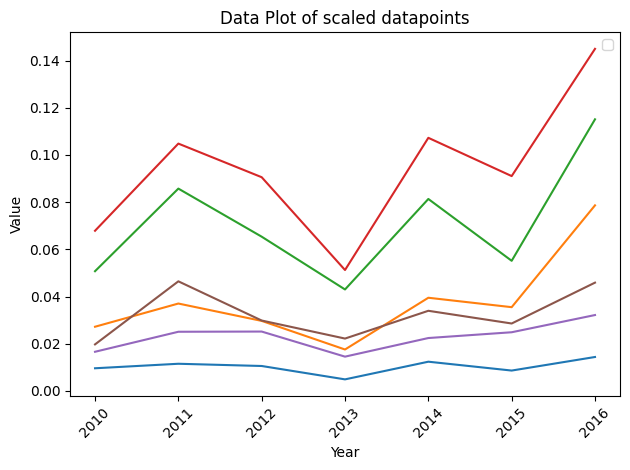

In [62]:
# Extract the years from the column names
years = biomass_history_scaled.columns[2:9]
i = 0
# Loop through each row and plot the values against years
for index, row in biomass_history_scaled.iterrows():
    plt.plot(years, row[2:9])
    i += 1
    if i == 6:
        break

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Data Plot of scaled datapoints')
plt.legend()
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


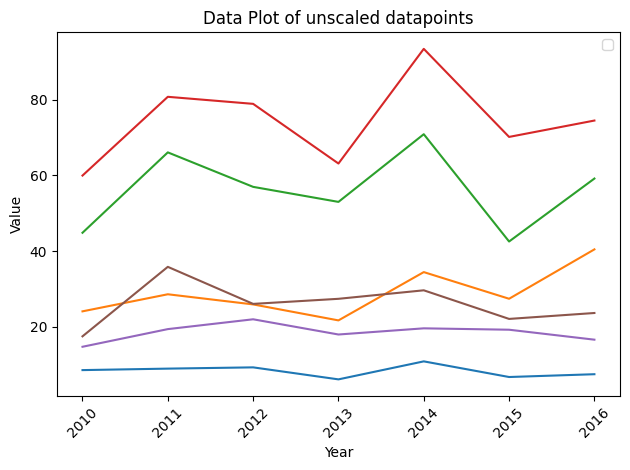

In [63]:
# Extract the years from the column names
years = biomass_history_unscaled.columns[2:9]
i = 0
# Loop through each row and plot the values against years
for index, row in biomass_history_unscaled.iterrows():
    plt.plot(years, row[2:9])
    i += 1
    if i == 6:
        break

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Data Plot of unscaled datapoints')
plt.legend()
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### Test for stationary points

In [64]:
test_scaled = time_series_data_scaled.iloc[:5,:]
test_unscaled = time_series_data_unscaled.iloc[:5,:]
y_scaled = y_time_series_data_scaled[:5]
y_unscaled = y_time_series_data_unscaled[:5]

In [65]:
from statsmodels.tsa.stattools import adfuller

In [66]:
# function to return if the point is stationary or not

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = "AIC")
    #print(dftest)
    
    if dftest[1] < 0.05:
        return True
    else:
        return False

In [67]:
test_unscaled

,2010,2011,2012,2013,2014,2015,2016
0,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925
1,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847
2,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629
3,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720
4,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315


#### Transformations to transform non-stationary point

In [68]:
# function to count number of stationary points, given a dataframe
def number_of_non_stationary_points(dataframe):
    count_of_non_stationary_points = 0
    for row in dataframe.itertuples():

        data = np.cbrt(pd.DataFrame(row[1:])).diff().dropna()

        ad_test_result = ad_test(data)

        if ad_test_result == True:
            pass
        else:
            count_of_non_stationary_points += 1

    return count_of_non_stationary_points

number_of_non_stationary_points(time_series_data_scaled)

1152

In [69]:
# function to count number of stationary points using boxcox transformation, given a dataframe
from scipy import stats
def number_of_non_stationary_points_using_boxcox(dataframe):
    count_of_non_stationary_points = 0

    for row in dataframe.itertuples():
        fitted_data, fitted_lambda = stats.boxcox(np.array(row[1:]))
        ad_test_result = ad_test(fitted_data)
        if ad_test_result == True:
            pass
        else:
            count_of_non_stationary_points += 1

    return count_of_non_stationary_points

number_of_non_stationary_points_using_boxcox(test_unscaled)

2

### Transforming data using trnsformation

In [70]:
def transform_data(data):

    transformed_data = np.cbrt(data)

    return transformed_data

In [71]:
data = transform_data(time_series_data_unscaled.T).T

In [72]:
y_transformed = np.cbrt(y_time_series_data_unscaled)

### Train test split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(data, y_transformed, test_size = 0.2, random_state = 0)

In [74]:
X_test

,2010,2011,2012,2013,2014,2015,2016
2328,1.219411,0.946902,1.262007,1.484247,1.002913,1.162219,1.337890
1742,8.159790,8.393416,5.929592,8.232699,7.915749,5.023372,3.772702
810,6.887586,6.682085,6.082467,6.666937,6.314450,6.937421,6.283969
2014,3.616573,4.074850,3.559647,4.858685,5.991146,4.271570,4.295514
618,5.709948,5.514935,5.839775,5.834281,6.384730,6.069859,6.255604
...,...,...,...,...,...,...,...
1814,5.916216,5.802449,4.870573,5.751108,5.300417,5.320570,5.114533
1388,6.067389,6.667269,3.377810,7.109068,6.636790,6.172225,4.196196
2270,1.131605,1.140573,1.061315,1.404399,1.196332,1.269430,1.229715
794,8.079581,7.793697,8.147028,8.147028,8.147028,7.793697,6.751016


## Forecasting

#### Implementing Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [76]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.9586360524272801

In [78]:
X_train

,2010,2011,2012,2013,2014,2015,2016
386,5.789028,6.294726,5.791666,5.604422,5.918744,5.751355,5.553402
1735,1.603029,1.383970,1.315830,1.884903,1.824933,1.067204,1.933602
459,1.438774,1.390198,2.232995,1.733918,1.315608,1.374637,2.436599
1129,3.870883,3.780648,3.729291,3.901181,4.276163,4.150421,4.164021
1914,8.388221,7.785657,5.510504,9.946074,7.421778,8.276744,6.766588
...,...,...,...,...,...,...,...
1033,2.687128,3.236824,1.658925,2.927575,3.099355,2.819101,2.053080
1731,2.446358,3.147946,2.325375,2.728421,3.541715,2.545856,2.430106
763,4.209077,4.327385,4.141970,4.141970,4.141970,4.327385,4.677581
835,2.326156,2.166888,2.292438,2.230038,2.041486,2.370664,2.429322


In [79]:
y_train

,2017
386,5.381477
1735,1.797968
459,1.504663
1129,4.471730
1914,7.515696
...,...
1033,3.524619
1731,2.490122
763,4.209077
835,2.238620


## Implementing LSTM

In [80]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [81]:
import numpy as np

In [82]:
# setting the seed to achieve consistent and less random predictions at each execution
np.random.seed(0)

# setting the model architecture
model=Sequential()
model.add(LSTM(100,return_sequences = True, activation='tanh',input_shape=(len(X_train.columns),1)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences = True, activation='tanh'))
model.add(Dropout(0.1))

model.add(LSTM(100, activation = 'tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# printing the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7, 100)            40800     
                                                                 
 dropout_3 (Dropout)         (None, 7, 100)            0         
                                                                 
 lstm_4 (LSTM)               (None, 7, 100)            80400     
                                                                 
 dropout_4 (Dropout)         (None, 7, 100)            0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [83]:
# compiling the model
model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.35, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
158/158 [==============================] - 13s 38ms/step - loss: 1.7427 - val_loss: 0.3429
Epoch 2/50
158/158 [==============================] - 5s 30ms/step - loss: 0.4349 - val_loss: 0.6901
Epoch 3/50
158/158 [==============================] - 4s 26ms/step - loss: 0.4169 - val_loss: 0.3217
Epoch 4/50
158/158 [==============================] - 4s 25ms/step - loss: 0.4270 - val_loss: 0.2737
Epoch 5/50
158/158 [==============================] - 4s 26ms/step - loss: 0.4308 - val_loss: 0.4186
Epoch 6/50
158/158 [==============================] - 4s 27ms/step - loss: 0.4088 - val_loss: 0.3187
Epoch 7/50
158/158 [==============================] - 5s 33ms/step - loss: 0.3657 - val_loss: 0.3235
Epoch 8/50
158/158 [==============================] - 4s 28ms/step - loss: 0.4180 - val_loss: 0.3156
Epoch 9/50
158/158 [==============================] - 5s 31ms/step - loss: 0.3760 - val_loss: 0.2417
Epoch 10/50
158/158 [==============================] - 4s 28ms/step - loss: 0.3846 - val_l

#### Predictions

In [84]:
# Predictions
predictions = model.predict(X_train) 

61/61 [==============================] - 3s 17ms/step


In [85]:
predictions

array([[5.993554 ],
       [1.6391997],
       [1.7177498],
       ...,
       [4.6389437],
       [2.4872642],
       [7.9174857]], dtype=float32)

In [86]:
# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

484/484 [==============================] - 3s 6ms/step - loss: 0.1171
Train Loss = 0.1283
Test Loss = 0.1171


In [87]:
# training the model on the whole dataset
model.fit(data, y_transformed, validation_split=0.35, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
197/197 [==============================] - 5s 26ms/step - loss: 0.1590 - val_loss: 0.1190
Epoch 2/50
197/197 [==============================] - 5s 25ms/step - loss: 0.1608 - val_loss: 0.1460
Epoch 3/50
197/197 [==============================] - 5s 26ms/step - loss: 0.1631 - val_loss: 0.1128
Epoch 4/50
197/197 [==============================] - 5s 26ms/step - loss: 0.1511 - val_loss: 0.1629
Epoch 5/50
197/197 [==============================] - 5s 27ms/step - loss: 0.1519 - val_loss: 0.1595
Epoch 6/50
197/197 [==============================] - 5s 26ms/step - loss: 0.1599 - val_loss: 0.1791
Epoch 7/50
197/197 [==============================] - 5s 24ms/step - loss: 0.1613 - val_loss: 0.1452
Epoch 8/50
197/197 [==============================] - 5s 25ms/step - loss: 0.1527 - val_loss: 0.1660
Epoch 9/50
197/197 [==============================] - 5s 27ms/step - loss: 0.1466 - val_loss: 0.1988
Epoch 10/50
197/197 [==============================] - 5s 25ms/step - loss: 0.1608 - val_lo

## Final Data Prepration 

In [88]:
pred_2018 = model.predict(data) 

76/76 [==============================] - 1s 15ms/step


In [89]:
pred_2018 =  pd.DataFrame(pred_2018, columns = ['2018'])

In [90]:
data_with_2018 = pd.concat([data, y_transformed, pred_2018], axis=1)

In [91]:
pred_2019 = model.predict(data_with_2018) 
pred_2019 =  pd.DataFrame(pred_2019, columns = ['2019'])

76/76 [==============================] - 3s 17ms/step


In [106]:
biomass_availability_forecasted_data = pd.concat([data_with_2018, pred_2019], axis=1)

In [107]:
biomass_availability_forecasted_data

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,2.038884,2.069909,2.095545,1.819447,2.209625,1.880250,1.947635,1.730287,1.992391,2.579031
1,2.885692,3.056391,2.957414,2.786433,3.252878,3.013345,3.432215,3.479525,3.217331,3.969186
2,3.552452,4.043508,3.848102,3.756374,4.139221,3.490234,3.896987,4.183214,4.088054,4.740341
3,3.914311,4.323565,4.290054,3.982435,4.538985,4.125269,4.208462,4.658044,4.498143,5.119818
4,2.447067,2.683647,2.798985,2.615859,2.693171,2.676141,2.547431,2.965792,2.510371,3.094588
...,...,...,...,...,...,...,...,...,...,...
2413,1.732465,1.653013,1.628786,1.385384,1.722874,1.743696,1.858493,1.745879,1.741387,2.653046
2414,0.496356,0.502279,0.466459,0.481323,0.495627,0.496599,0.526305,0.494098,0.544760,0.763339
2415,0.340319,0.344380,0.319821,0.330012,0.339820,0.340486,0.360853,0.338771,0.392074,0.527624
2416,1.395773,1.110685,0.935490,1.064345,1.095975,1.098124,1.163813,1.092594,1.300769,2.431090


In [108]:
biomass_availability_forecasted_data.dtypes

2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float32
2019    float32
dtype: object

In [109]:
biomass_availability_forecasted_data.loc[0,'2018']

1.9923913

## Count function for positive and negative trend

In [110]:
def check(data):
    positive=0
    neg=0
    for i,_ in data.iterrows():
        if(data.loc[i,'2018']>data.loc[i,'2017'] and data.loc[i,'2019']>data.loc[i,'2018']):
            positive+=1
        else:
            neg+=1
    print('Positive tend count : '+str(positive))
    print('Negative trend count : '+str(neg))

In [111]:
check(biomass_availability_forecasted_data)

Positive tend count : 947
Negative trend count : 1471


## Exporting forecasted data

In [112]:
biomass_availability_forecasted_data

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,2.038884,2.069909,2.095545,1.819447,2.209625,1.880250,1.947635,1.730287,1.992391,2.579031
1,2.885692,3.056391,2.957414,2.786433,3.252878,3.013345,3.432215,3.479525,3.217331,3.969186
2,3.552452,4.043508,3.848102,3.756374,4.139221,3.490234,3.896987,4.183214,4.088054,4.740341
3,3.914311,4.323565,4.290054,3.982435,4.538985,4.125269,4.208462,4.658044,4.498143,5.119818
4,2.447067,2.683647,2.798985,2.615859,2.693171,2.676141,2.547431,2.965792,2.510371,3.094588
...,...,...,...,...,...,...,...,...,...,...
2413,1.732465,1.653013,1.628786,1.385384,1.722874,1.743696,1.858493,1.745879,1.741387,2.653046
2414,0.496356,0.502279,0.466459,0.481323,0.495627,0.496599,0.526305,0.494098,0.544760,0.763339
2415,0.340319,0.344380,0.319821,0.330012,0.339820,0.340486,0.360853,0.338771,0.392074,0.527624
2416,1.395773,1.110685,0.935490,1.064345,1.095975,1.098124,1.163813,1.092594,1.300769,2.431090


In [113]:
def inverse_cuberoot_transformation(data):
    return data**3

In [121]:
biomass_availability_forecasted_data_ = inverse_cuberoot_transformation(biomass_availability_forecasted_data)

In [122]:
data = pd.concat([location, biomass_availability_forecasted_data_], axis=1)

In [123]:
data.to_csv('forecasted.csv')

In [124]:
data

,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296,7.909043,17.154169
1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945,33.303310,62.532272
2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232,68.320305,106.519424
3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352,91.012245,134.203400
4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885,15.820264,29.635239
...,...,...,...,...,...,...,...,...,...,...,...,...
2413,20.15456,72.84432,5.199882,4.516778,4.321080,2.658953,5.113997,5.301668,6.419223,5.321604,5.280633,18.673874
2414,20.15456,72.92394,0.122287,0.126717,0.101494,0.111509,0.121749,0.122467,0.145785,0.120626,0.161665,0.444787
2415,20.15456,73.00357,0.039415,0.040843,0.032713,0.035941,0.039241,0.039473,0.046989,0.038879,0.060271,0.146884
2416,20.15456,73.08319,2.719220,1.370163,0.818687,1.205721,1.316443,1.324201,1.576338,1.304297,2.200899,14.368222
